In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the datasets

df_vacc = pd.read_csv("country_vaccinations.csv")
df_manu = pd.read_csv("country_vaccinations_by_manufacturer.csv")

In [3]:
df_vacc

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86507,Zimbabwe,ZWE,2022-03-25,8691642.0,4814582.0,3473523.0,139213.0,69579.0,57.59,31.90,23.02,4610.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
86508,Zimbabwe,ZWE,2022-03-26,8791728.0,4886242.0,3487962.0,100086.0,83429.0,58.25,32.38,23.11,5528.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
86509,Zimbabwe,ZWE,2022-03-27,8845039.0,4918147.0,3493763.0,53311.0,90629.0,58.61,32.59,23.15,6005.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
86510,Zimbabwe,ZWE,2022-03-28,8934360.0,4975433.0,3501493.0,89321.0,100614.0,59.20,32.97,23.20,6667.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...


In [4]:
df_manu

,location,date,vaccine,total_vaccinations
0,Argentina,2020-12-29,Moderna,2
1,Argentina,2020-12-29,Oxford/AstraZeneca,3
2,Argentina,2020-12-29,Sinopharm/Beijing,1
3,Argentina,2020-12-29,Sputnik V,20481
4,Argentina,2020-12-30,Moderna,2
...,...,...,...,...
35618,European Union,2022-03-29,Oxford/AstraZeneca,67403106
35619,European Union,2022-03-29,Pfizer/BioNTech,600519998
35620,European Union,2022-03-29,Sinopharm/Beijing,2301516
35621,European Union,2022-03-29,Sinovac,1809


In [5]:
df_vacc.dtypes

country                                 object
iso_code                                object
date                                    object
total_vaccinations                     float64
people_vaccinated                      float64
people_fully_vaccinated                float64
daily_vaccinations_raw                 float64
daily_vaccinations                     float64
total_vaccinations_per_hundred         float64
people_vaccinated_per_hundred          float64
people_fully_vaccinated_per_hundred    float64
daily_vaccinations_per_million         float64
vaccines                                object
source_name                             object
source_website                          object
dtype: object

In [6]:
df_manu.dtypes

location              object
date                  object
vaccine               object
total_vaccinations     int64
dtype: object

In [7]:
# Convert date column to datetime

df_vacc['date']=pd.to_datetime(df_vacc['date'])
df_vacc

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86507,Zimbabwe,ZWE,2022-03-25,8691642.0,4814582.0,3473523.0,139213.0,69579.0,57.59,31.90,23.02,4610.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
86508,Zimbabwe,ZWE,2022-03-26,8791728.0,4886242.0,3487962.0,100086.0,83429.0,58.25,32.38,23.11,5528.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
86509,Zimbabwe,ZWE,2022-03-27,8845039.0,4918147.0,3493763.0,53311.0,90629.0,58.61,32.59,23.15,6005.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
86510,Zimbabwe,ZWE,2022-03-28,8934360.0,4975433.0,3501493.0,89321.0,100614.0,59.20,32.97,23.20,6667.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...


In [8]:
df_vacc.dtypes

country                                        object
iso_code                                       object
date                                   datetime64[ns]
total_vaccinations                            float64
people_vaccinated                             float64
people_fully_vaccinated                       float64
daily_vaccinations_raw                        float64
daily_vaccinations                            float64
total_vaccinations_per_hundred                float64
people_vaccinated_per_hundred                 float64
people_fully_vaccinated_per_hundred           float64
daily_vaccinations_per_million                float64
vaccines                                       object
source_name                                    object
source_website                                 object
dtype: object

In [9]:
df_manu['date']=pd.to_datetime(df_manu['date'])
df_manu

,location,date,vaccine,total_vaccinations
0,Argentina,2020-12-29,Moderna,2
1,Argentina,2020-12-29,Oxford/AstraZeneca,3
2,Argentina,2020-12-29,Sinopharm/Beijing,1
3,Argentina,2020-12-29,Sputnik V,20481
4,Argentina,2020-12-30,Moderna,2
...,...,...,...,...
35618,European Union,2022-03-29,Oxford/AstraZeneca,67403106
35619,European Union,2022-03-29,Pfizer/BioNTech,600519998
35620,European Union,2022-03-29,Sinopharm/Beijing,2301516
35621,European Union,2022-03-29,Sinovac,1809


In [10]:
df_manu.dtypes

location                      object
date                  datetime64[ns]
vaccine                       object
total_vaccinations             int64
dtype: object

In [11]:
# Basic Information

df_vacc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86512 entries, 0 to 86511
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              86512 non-null  object        
 1   iso_code                             86512 non-null  object        
 2   date                                 86512 non-null  datetime64[ns]
 3   total_vaccinations                   43607 non-null  float64       
 4   people_vaccinated                    41294 non-null  float64       
 5   people_fully_vaccinated              38802 non-null  float64       
 6   daily_vaccinations_raw               35362 non-null  float64       
 7   daily_vaccinations                   86213 non-null  float64       
 8   total_vaccinations_per_hundred       43607 non-null  float64       
 9   people_vaccinated_per_hundred        41294 non-null  float64       
 10  people_ful

In [12]:
df_manu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35623 entries, 0 to 35622
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   location            35623 non-null  object        
 1   date                35623 non-null  datetime64[ns]
 2   vaccine             35623 non-null  object        
 3   total_vaccinations  35623 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 1.1+ MB


In [13]:
# Missining values

df_vacc.isnull().sum()

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     42905
people_vaccinated                      45218
people_fully_vaccinated                47710
daily_vaccinations_raw                 51150
daily_vaccinations                       299
total_vaccinations_per_hundred         42905
people_vaccinated_per_hundred          45218
people_fully_vaccinated_per_hundred    47710
daily_vaccinations_per_million           299
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

In [14]:
# sort values by country and date before filling the null values

df_vacc=df_vacc.sort_values(['country','date'])
df_vacc

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86507,Zimbabwe,ZWE,2022-03-25,8691642.0,4814582.0,3473523.0,139213.0,69579.0,57.59,31.90,23.02,4610.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
86508,Zimbabwe,ZWE,2022-03-26,8791728.0,4886242.0,3487962.0,100086.0,83429.0,58.25,32.38,23.11,5528.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
86509,Zimbabwe,ZWE,2022-03-27,8845039.0,4918147.0,3493763.0,53311.0,90629.0,58.61,32.59,23.15,6005.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
86510,Zimbabwe,ZWE,2022-03-28,8934360.0,4975433.0,3501493.0,89321.0,100614.0,59.20,32.97,23.20,6667.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...


In [15]:
# fill cumulative columns using forward fill (ffill)

cum_cols=['total_vaccinations','people_vaccinated','people_fully_vaccinated']
cum_cols

['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated']

In [16]:
df_vacc[cum_cols]=df_vacc.groupby('country')[cum_cols].ffill()
df_vacc[cum_cols]

,total_vaccinations,people_vaccinated,people_fully_vaccinated
0,0.0,0.0,NaN
1,0.0,0.0,NaN
2,0.0,0.0,NaN
3,0.0,0.0,NaN
4,0.0,0.0,NaN
...,...,...,...
86507,8691642.0,4814582.0,3473523.0
86508,8791728.0,4886242.0,3487962.0
86509,8845039.0,4918147.0,3493763.0
86510,8934360.0,4975433.0,3501493.0


In [17]:
# fill smoothed daily_vaccinations using forward fill

df_vacc['daily_vaccinations'] = df_vacc.groupby('country')['daily_vaccinations'].ffill()

In [18]:
# drop daily_vaccinations_raw this column is not needed

df_vacc.drop(columns=['daily_vaccinations_raw'], inplace=True)
df_vacc

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,0.00,0.00,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,0.0,0.0,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,0.0,0.0,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,0.0,0.0,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,0.0,0.0,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86507,Zimbabwe,ZWE,2022-03-25,8691642.0,4814582.0,3473523.0,69579.0,57.59,31.90,23.02,4610.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
86508,Zimbabwe,ZWE,2022-03-26,8791728.0,4886242.0,3487962.0,83429.0,58.25,32.38,23.11,5528.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
86509,Zimbabwe,ZWE,2022-03-27,8845039.0,4918147.0,3493763.0,90629.0,58.61,32.59,23.15,6005.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
86510,Zimbabwe,ZWE,2022-03-28,8934360.0,4975433.0,3501493.0,100614.0,59.20,32.97,23.20,6667.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...


In [19]:
# fill per _hundred column by recalculating

df_vacc['total_vaccinations_per_hundred'] = (df_vacc['total_vaccinations'] / df_vacc['total_vaccinations'].max()) * 100
df_vacc['people_vaccinated_per_hundred'] = (df_vacc['people_vaccinated'] / df_vacc['people_vaccinated'].max()) * 100
df_vacc['people_fully_vaccinated_per_hundred'] = (df_vacc['people_fully_vaccinated'] / df_vacc['people_fully_vaccinated'].max()) * 100
df_vacc

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,0.0,0.0,NaN,1367.0,0.000000,0.000000,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,0.0,0.0,NaN,1367.0,0.000000,0.000000,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,0.0,0.0,NaN,1367.0,0.000000,0.000000,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,0.0,0.0,NaN,1367.0,0.000000,0.000000,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86507,Zimbabwe,ZWE,2022-03-25,8691642.0,4814582.0,3473523.0,69579.0,0.266359,0.377454,0.279947,4610.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
86508,Zimbabwe,ZWE,2022-03-26,8791728.0,4886242.0,3487962.0,83429.0,0.269426,0.383072,0.281111,5528.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
86509,Zimbabwe,ZWE,2022-03-27,8845039.0,4918147.0,3493763.0,90629.0,0.271060,0.385573,0.281579,6005.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
86510,Zimbabwe,ZWE,2022-03-28,8934360.0,4975433.0,3501493.0,100614.0,0.273797,0.390065,0.282202,6667.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...


In [20]:
# Fill remaining missing values with 0 if any

df_vacc = df_vacc.fillna(0)
df_vacc

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,0.0,0.0,0.0,1367.0,0.000000,0.000000,0.000000,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,0.0,0.0,0.0,1367.0,0.000000,0.000000,0.000000,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,0.0,0.0,0.0,1367.0,0.000000,0.000000,0.000000,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,0.0,0.0,0.0,1367.0,0.000000,0.000000,0.000000,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86507,Zimbabwe,ZWE,2022-03-25,8691642.0,4814582.0,3473523.0,69579.0,0.266359,0.377454,0.279947,4610.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
86508,Zimbabwe,ZWE,2022-03-26,8791728.0,4886242.0,3487962.0,83429.0,0.269426,0.383072,0.281111,5528.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
86509,Zimbabwe,ZWE,2022-03-27,8845039.0,4918147.0,3493763.0,90629.0,0.271060,0.385573,0.281579,6005.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
86510,Zimbabwe,ZWE,2022-03-28,8934360.0,4975433.0,3501493.0,100614.0,0.273797,0.390065,0.282202,6667.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...


In [21]:
df_vacc.isnull().sum()

country                                0
iso_code                               0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
vaccines                               0
source_name                            0
source_website                         0
dtype: int64

In [22]:
# missing value 
df_manu.isnull().sum()

location              0
date                  0
vaccine               0
total_vaccinations    0
dtype: int64

C:\Users\91805\AppData\Local\Temp\ipykernel_15812\2191408281.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_vaccinated.values,y=top_vaccinated.index,palette='viridis')


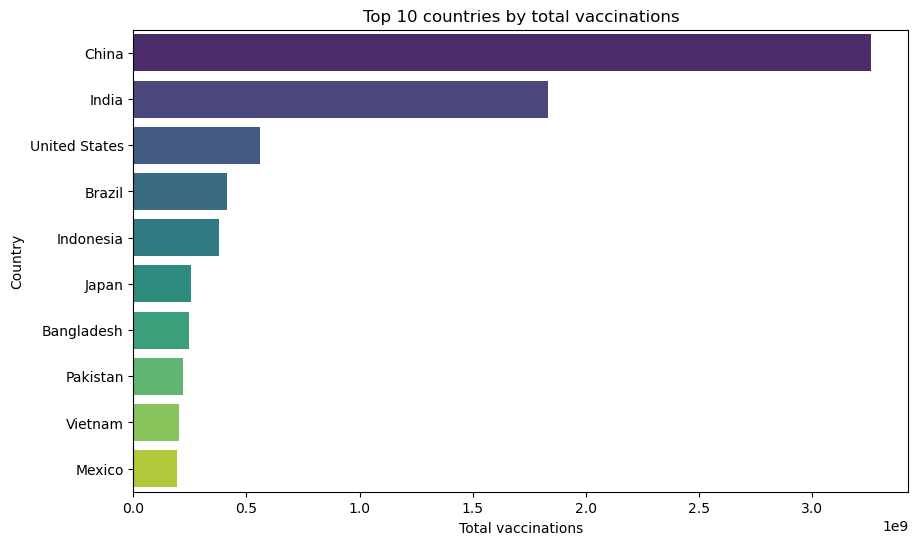

In [23]:
# Top 10 countries by total vaccinations

top_vaccinated = df_vacc.groupby('country')['total_vaccinations'].max().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_vaccinated.values,y=top_vaccinated.index,palette='viridis')
plt.title('Top 10 countries by total vaccinations')
plt.xlabel('Total vaccinations')
plt.ylabel('Country')
plt.show()

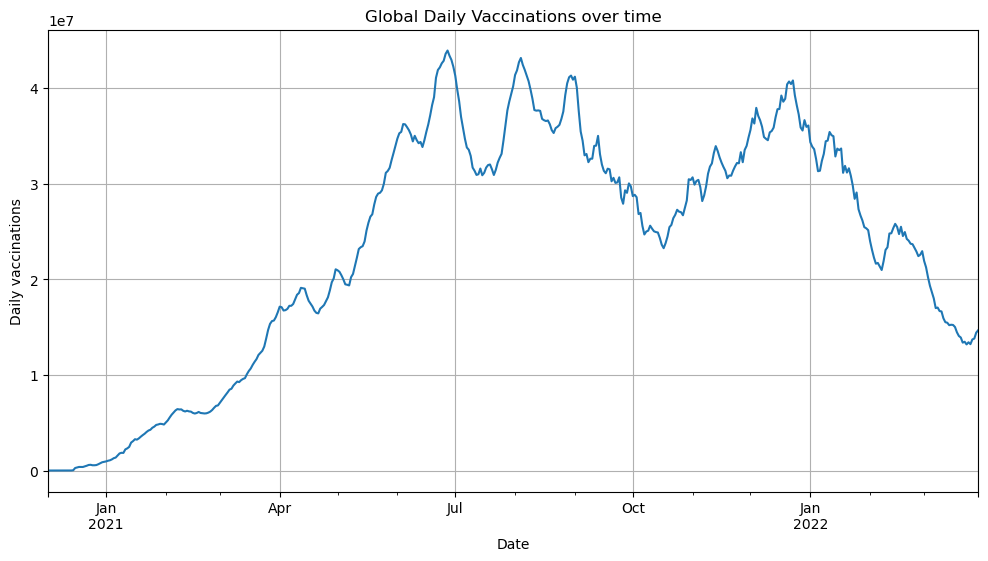

In [24]:
# Daily vaccinations tred (global)

global_daily=df_vacc.groupby('date')['daily_vaccinations'].sum()
plt.figure(figsize=(12,6))
global_daily.plot()
plt.title('Global Daily Vaccinations over time')
plt.ylabel('Daily vaccinations')
plt.xlabel('Date')
plt.grid(True)
plt.show()

C:\Users\91805\AppData\Local\Temp\ipykernel_15812\611369327.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vaccine_counts.values,y=vaccine_counts.index,palette='coolwarm')


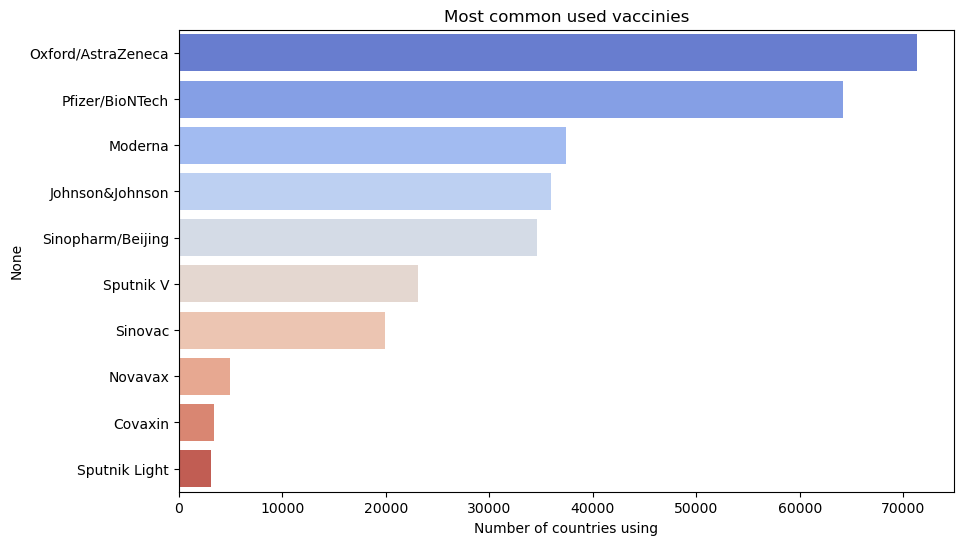

In [25]:
# Top vaccines used worldwide
vaccine_counts =df_vacc['vaccines'].str.split(', ',expand=True).stack().value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=vaccine_counts.values,y=vaccine_counts.index,palette='coolwarm')
plt.title('Most common used vaccinies')
plt.xlabel('Number of countries using')
#plt.tight_layout()
plt.show()

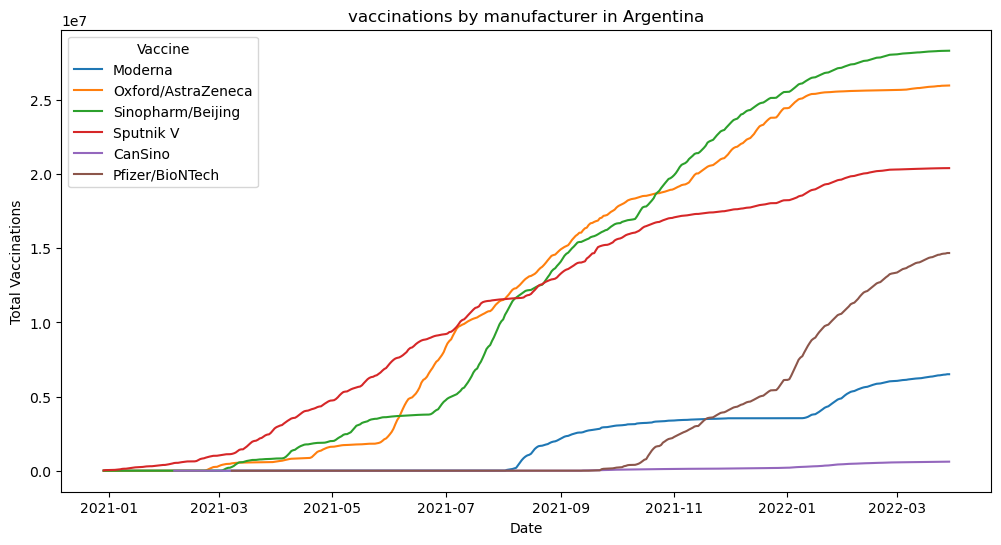

In [26]:
# Vaccinations by manufacturer 
argentina =df_manu[df_manu['location']=='Argentina']
plt.figure(figsize=(12,6))
sns.lineplot(data=argentina,x='date',y='total_vaccinations',hue='vaccine')
plt.title('vaccinations by manufacturer in Argentina')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.legend(title='Vaccine')
plt.show()

## model build

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,r2_score

In [28]:
# Step 1: Use the cleaned df_vacc (make sure missing values are handled already)
df_india = df_vacc[df_vacc['country'] == 'India'].copy()
df_india

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
35372,India,IND,2021-01-15,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://dashboard.cowin.gov.in/
35373,India,IND,2021-01-16,1.911810e+05,191181.0,0.0,191181.0,0.005859,0.014988,0.000000,137.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://dashboard.cowin.gov.in/
35374,India,IND,2021-01-17,2.243010e+05,224301.0,0.0,112150.0,0.006874,0.017585,0.000000,80.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://dashboard.cowin.gov.in/
35375,India,IND,2021-01-18,4.540490e+05,454049.0,0.0,151350.0,0.013915,0.035597,0.000000,109.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://dashboard.cowin.gov.in/
35376,India,IND,2021-01-19,6.748350e+05,674835.0,0.0,168709.0,0.020681,0.052906,0.000000,121.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://dashboard.cowin.gov.in/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35806,India,IND,2022-03-25,1.826266e+09,980435665.0,824764568.0,2433734.0,55.966706,76.864300,66.471620,1747.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://dashboard.cowin.gov.in/
35807,India,IND,2022-03-26,1.830285e+09,982687842.0,826360688.0,2830351.0,56.089885,77.040867,66.600258,2031.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://dashboard.cowin.gov.in/
35808,India,IND,2022-03-27,1.831348e+09,983190780.0,826884564.0,2851859.0,56.122444,77.080296,66.642480,2047.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://dashboard.cowin.gov.in/
35809,India,IND,2022-03-28,1.833040e+09,984051283.0,827610878.0,2736644.0,56.174304,77.147758,66.701017,1964.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://dashboard.cowin.gov.in/


In [29]:
# Drop unnecessary columns
df_india = df_india[['date', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated',
                     'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
                     'people_fully_vaccinated_per_hundred', 'daily_vaccinations']]
df_india

,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations
35372,2021-01-15,0.000000e+00,0.0,0.0,0.000000,0.000000,0.000000,0.0
35373,2021-01-16,1.911810e+05,191181.0,0.0,0.005859,0.014988,0.000000,191181.0
35374,2021-01-17,2.243010e+05,224301.0,0.0,0.006874,0.017585,0.000000,112150.0
35375,2021-01-18,4.540490e+05,454049.0,0.0,0.013915,0.035597,0.000000,151350.0
35376,2021-01-19,6.748350e+05,674835.0,0.0,0.020681,0.052906,0.000000,168709.0
...,...,...,...,...,...,...,...,...
35806,2022-03-25,1.826266e+09,980435665.0,824764568.0,55.966706,76.864300,66.471620,2433734.0
35807,2022-03-26,1.830285e+09,982687842.0,826360688.0,56.089885,77.040867,66.600258,2830351.0
35808,2022-03-27,1.831348e+09,983190780.0,826884564.0,56.122444,77.080296,66.642480,2851859.0
35809,2022-03-28,1.833040e+09,984051283.0,827610878.0,56.174304,77.147758,66.701017,2736644.0


In [30]:
# Drop remaining nulls just in case
df_india = df_india.dropna()
df_india

,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations
35372,2021-01-15,0.000000e+00,0.0,0.0,0.000000,0.000000,0.000000,0.0
35373,2021-01-16,1.911810e+05,191181.0,0.0,0.005859,0.014988,0.000000,191181.0
35374,2021-01-17,2.243010e+05,224301.0,0.0,0.006874,0.017585,0.000000,112150.0
35375,2021-01-18,4.540490e+05,454049.0,0.0,0.013915,0.035597,0.000000,151350.0
35376,2021-01-19,6.748350e+05,674835.0,0.0,0.020681,0.052906,0.000000,168709.0
...,...,...,...,...,...,...,...,...
35806,2022-03-25,1.826266e+09,980435665.0,824764568.0,55.966706,76.864300,66.471620,2433734.0
35807,2022-03-26,1.830285e+09,982687842.0,826360688.0,56.089885,77.040867,66.600258,2830351.0
35808,2022-03-27,1.831348e+09,983190780.0,826884564.0,56.122444,77.080296,66.642480,2851859.0
35809,2022-03-28,1.833040e+09,984051283.0,827610878.0,56.174304,77.147758,66.701017,2736644.0
